# ***Packaging***

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***1. Data loading, data type correction, and removal of irrelevant variables***

In [55]:
#Loading data as df (dataframe)
df = pd.read_excel('Investor Report-06_21_2025.xlsx', sheet_name=0)
df.head(2)

,Case Name,Account Name,State,Rate,Provider Client,DOL,Subject,Name of Procedure,Case Stage,Stage Chg Dt,...,Inv 1 Pd Dt,Inv 1 Pd $,Inv 2 Pd Dt,Inv 2 Pd $,Inv 3 Pd Dt,Inv 3 Pd $,Funding Status,Case Notes,Lien Notes,Case Status
0,Kami Orton,ALLRED VOGT & STUART,NaN,NaN,Durango Surgery Center,NaN,Surgery 1,NaN,Omni Purchase,09/21/2023,...,NaN,0.0,NaN,0.0,NaN,0.0,Purchased,NaN,NaN,Case was transferred per Rachelle \ndeal dire...
1,Chaves Still,Baric Law,California,NaN,Precision Medical Products,03/23/2023,Med Device 1,NaN,PENDING,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,Declined,Mgr: Jonathan 833-467-2022,Premise,VETTING \nsent vetting emailwith new bill-HD \...


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Case Name          8279 non-null   object 
 1   Account Name       8279 non-null   object 
 2   State              1491 non-null   object 
 3   Rate               2071 non-null   object 
 4   Provider Client    8250 non-null   object 
 5   DOL                6361 non-null   object 
 6   Subject            8279 non-null   object 
 7   Name of Procedure  5233 non-null   object 
 8   Case Stage         8237 non-null   object 
 9   Stage Chg Dt       6580 non-null   object 
 10  DOS                8194 non-null   object 
 11  Batch Dt           6684 non-null   object 
 12  Bill Amt           8265 non-null   float64
 13  Purch Amt          8183 non-null   float64
 14  Purch Dt           6601 non-null   object 
 15  Investor 1         8005 non-null   object 
 16  Port 1             6589 

In [57]:
# Removal of irrelevant variables
irrelevant_variables = ['Case Name','Inv 1 Pd Dt','Inv 2 Pd Dt','Inv 3 Pd Dt','Case Notes','Lien Notes','Case Status','DOL','DOS','Investor 1','Port 1','Investor 2','Port 2','State','Inv 1 Purch $','Inv 2 Purch $','Inv 1 Pd $','Inv 2 Pd $','Inv 3 Pd $','Rate','Stage Chg Dt','Batch Dt','Pay Dt', 'Case Stage','Name of Procedure']
df = df.drop(irrelevant_variables, axis=1, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account Name     8279 non-null   object 
 1   Provider Client  8250 non-null   object 
 2   Subject          8279 non-null   object 
 3   Bill Amt         8265 non-null   float64
 4   Purch Amt        8183 non-null   float64
 5   Purch Dt         6601 non-null   object 
 6   Pay Amt          7793 non-null   float64
 7   Funding Status   8225 non-null   object 
dtypes: float64(3), object(5)
memory usage: 517.6+ KB


In [58]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Purch Dt,Pay Amt,Funding Status
0,ALLRED VOGT & STUART,Durango Surgery Center,Surgery 1,16671.0,5501.43,05/28/2020,0.0,Purchased
1,Baric Law,Precision Medical Products,Med Device 1,16449.0,0.00,NaN,0.0,Declined
2,Baric Law,Precision Medical Products,Med Device 2,995.0,0.00,NaN,0.0,Declined
3,Baric Law,Precision Medical Products,Med Device 1,4250.0,0.00,NaN,0.0,Approved
4,Baric Law,Precision Medical Products,Med Device 3,4250.0,0.00,NaN,0.0,Declined


In [59]:
# Data type casting (corrections)
categorical_columns = ['Account Name','Provider Client','Funding Status','Subject']
df[categorical_columns] = df[categorical_columns].astype('category')

numerical_columns = ['Bill Amt', 'Purch Amt','Pay Amt']
df[numerical_columns] = df[numerical_columns].astype('float')

date_columns = ['Purch Dt']
for col in date_columns:
    df[col] = df[col].astype(str)

#df[date_columns] = df[date_columns].apply(pd.to_datetime, format='%m/%d/%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8279 entries, 0 to 8278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     8279 non-null   category
 1   Provider Client  8250 non-null   category
 2   Subject          8279 non-null   category
 3   Bill Amt         8265 non-null   float64 
 4   Purch Amt        8183 non-null   float64 
 5   Purch Dt         8279 non-null   object  
 6   Pay Amt          7793 non-null   float64 
 7   Funding Status   8225 non-null   category
dtypes: category(4), float64(3), object(1)
memory usage: 341.4+ KB


# ***2. Statistical analysis***

In [60]:
df['Account Name'].unique()

[' ALLRED  VOGT &  STUART', ' Baric Law', ' COLONY LAW', ' GUROVICH LAW GROUP APC,', ' Guy Levy Law', ..., 'Yuhl Carr LLP', 'ZAKARYAN LAW PC', 'Zane Cagle', 'Zargar & Irvin Personal Injury (ZIPI Law)', 'Zohrabyan Law Group']
Length: 737
Categories (737, object): [' ALLRED  VOGT &  STUART', ' Baric Law', ' COLONY LAW', ' GUROVICH LAW GROUP APC,', ..., 'Zane Cagle', 'Zargar & Irvin Personal Injury (ZIPI Law)', 'Zohrabyan Law Group', 'void']

<Axes: xlabel='Provider Client'>

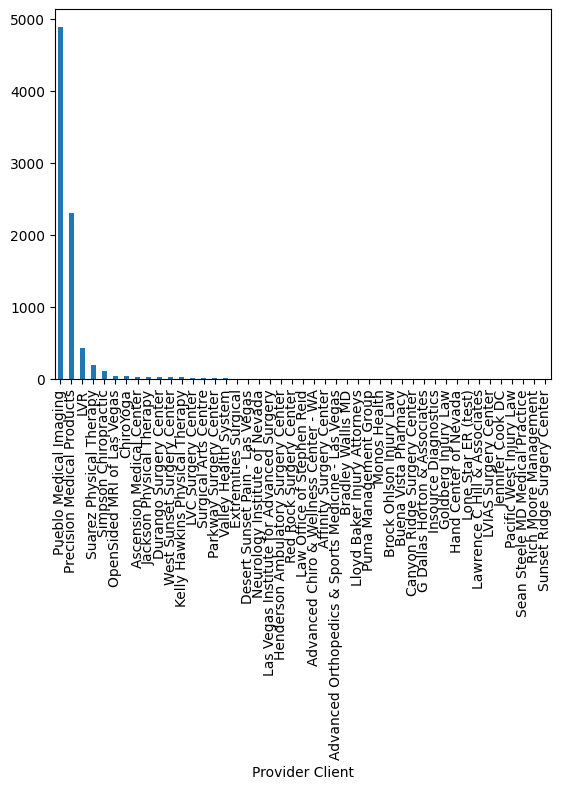

In [61]:
df['Provider Client'].value_counts().plot(kind='bar')

<Axes: xlabel='Subject'>

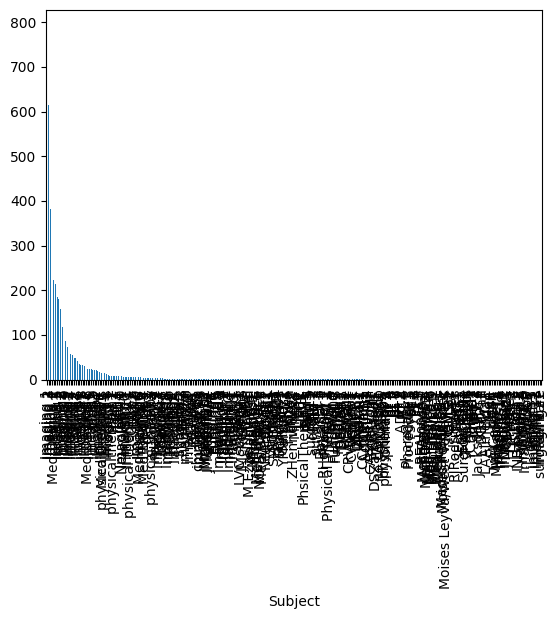

In [76]:
df['Subject'].value_counts().plot(kind='bar')

<Axes: xlabel='Funding Status'>

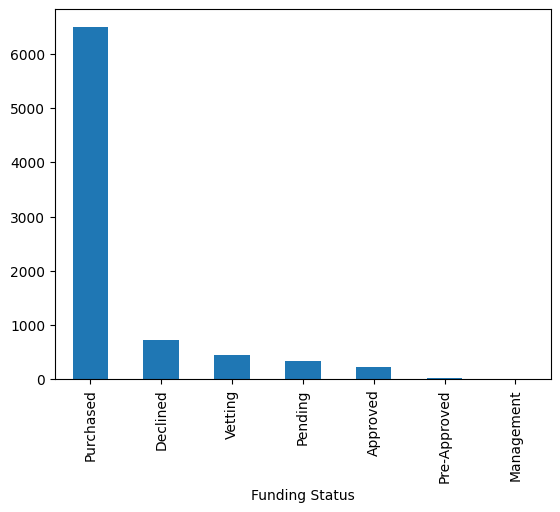

In [62]:
df['Funding Status'].value_counts().plot(kind='bar')

<Axes: >

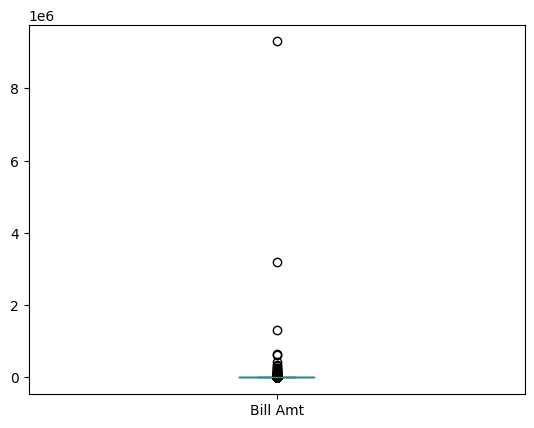

In [63]:
df['Bill Amt'].plot(kind='box')

<Axes: >

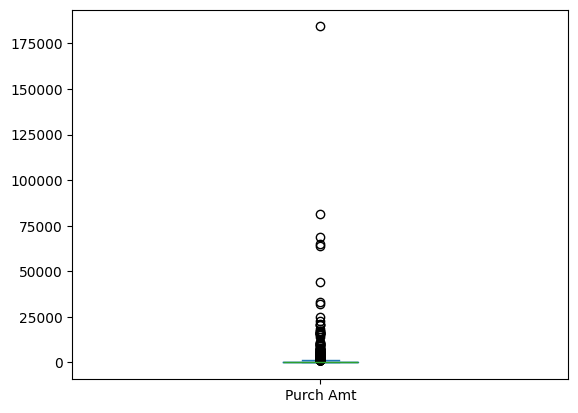

In [64]:
df['Purch Amt'].plot(kind='box')

<Axes: >

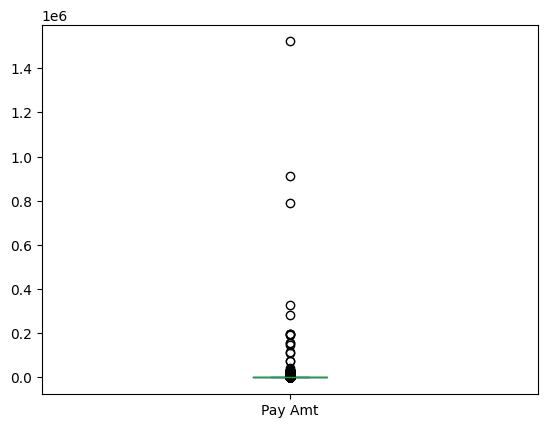

In [65]:
df['Pay Amt'].plot(kind='box')

# ***Organización de datos***

In [66]:
df['Funding Status'].unique()

['Purchased', 'Declined', 'Approved', 'Vetting', 'Management', 'Pre-Approved', 'Pending', NaN]
Categories (7, object): ['Approved', 'Declined', 'Management', 'Pending', 'Pre-Approved', 'Purchased', 'Vetting']

In [67]:
# Se eliminan los registros que hayan sido declined porque no se tiene información completa de ellos y los que nos importa analizar son los comparados

indices_a_eliminar = df[df['Funding Status'] != 'Purchased'].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 8274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     6497 non-null   category
 1   Provider Client  6479 non-null   category
 2   Subject          6497 non-null   category
 3   Bill Amt         6495 non-null   float64 
 4   Purch Amt        6495 non-null   float64 
 5   Purch Dt         6497 non-null   object  
 6   Pay Amt          6131 non-null   float64 
 7   Funding Status   6497 non-null   category
dtypes: category(4), float64(3), object(1)
memory usage: 325.9+ KB


In [69]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Purch Dt,Pay Amt,Funding Status
0,ALLRED VOGT & STUART,Durango Surgery Center,Surgery 1,16671.0,5501.43,05/28/2020,0.0,Purchased
15,"Law Offices of Jennie Levin P,C,",Precision Medical Products,Med Device 1,4250.0,1062.50,06/10/2025,0.0,Purchased
17,M&Y Law,Precision Medical Products,Med Device 1,995.0,248.75,11/01/2024,0.0,Purchased
22,Okhovat Law Firm,Precision Medical Products,Med Device 1,4250.0,1062.50,12/24/2024,0.0,Purchased
23,Stephan Filip PC,Precision Medical Products,Med Device 1,3345.0,83.63,06/10/2025,0.0,Purchased


<Axes: xlabel='Funding Status'>

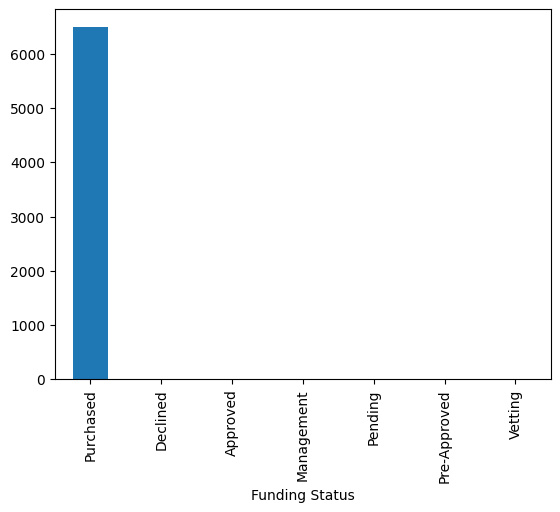

In [70]:
df['Funding Status'].value_counts().plot(kind='bar')

In [71]:
# Se eliminan los registros que aún no tengan valor en Pay amt porque este es valor que reciben cuando terminó el proceso, si no está este valor es porque aún no se ha terminado el caso

indices_a_eliminar = df[df['Pay Amt'] <= 0].index

# Eliminar esas filas usando drop(axis=0)
df.drop(indices_a_eliminar, axis=0, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 26 to 8271
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Account Name     4382 non-null   category
 1   Provider Client  4366 non-null   category
 2   Subject          4382 non-null   category
 3   Bill Amt         4380 non-null   float64 
 4   Purch Amt        4380 non-null   float64 
 5   Purch Dt         4382 non-null   object  
 6   Pay Amt          4016 non-null   float64 
 7   Funding Status   4382 non-null   category
dtypes: category(4), float64(3), object(1)
memory usage: 230.9+ KB


In [73]:
df.head()

,Account Name,Provider Client,Subject,Bill Amt,Purch Amt,Purch Dt,Pay Amt,Funding Status
26,A&T Legal Group,Precision Medical Products,Med Device 1,4250.0,1190.00,09/29/2023,750.0,Purchased
28,Aaron Law Group,Precision Medical Products,Med Device 1,4250.0,1360.00,03/18/2024,2762.5,Purchased
39,Accident Fighters APC,Precision Medical Products,Med Device 1,4250.0,1062.50,06/14/2024,2125.0,Purchased
40,Accident Lawyers Group Pros,Precision Medical Products,Med Device 1,4250.0,1190.00,12/26/2023,1262.0,Purchased
41,Ace Law Firm - California,Precision Medical Products,Med Device 1,995.0,248.75,11/14/2024,398.0,Purchased


<Axes: >

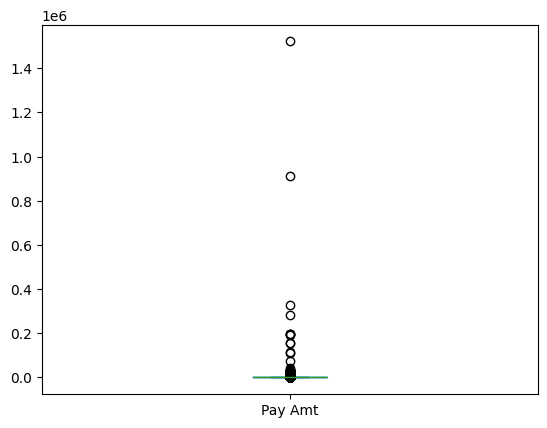

In [74]:
df['Pay Amt'].plot(kind='box')

In [75]:
df['Case Stage'].value_counts().plot(kind='bar')

KeyError: 'Case Stage'

In [ ]:
# Creamos la columna ROI y cálculamos el ROI para cada caso